# Insurance Claim Fraud Detection

# Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:

#Loading the dataset given
import requests
import pandas as pd

df = pd.read_csv('Automobile_insurance_fraud.Csv')

In [47]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [48]:
#shape of the dataset
df.shape

(1000, 40)

In [49]:
#columns in the dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [50]:
#data types of all the features of the datset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [52]:
#checking for missing values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The _c39 column is completely null, so we can remove the column

1.	months_as_customer: Number of months of patronage
    
2.	age: the length of time a customer has lived or a thing has existed
    
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
    
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
    
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
    
6.	policy_csl: is basically Combined Single Limit
    
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
    
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
    
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
    
10.	insured_zip: It is the zip code where the insurance was made
    
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
    
12.	insured_education_level: This refers to the Level of education of the customer
    
13.	insured_occupation: This refers Occupation of the customer
    
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
    
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
        
16.	capital-gains: This refers to profit accrued due to insurance premium
    
17.	capital-loss: This refers to the losses incurred due to insurance claims
    
18.	incident_date: This refers to the date which claims where made by customers
    
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
    
20.	collision_type: This refers to the area of damage on the vehicle
    
21.	incident_severity: This refers to the extent/level of damage
    
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
    
23.	incident_state: This refers to the state at which the accident happened
    
24.	incident_city: This refers to the city at which the accident happened
    
25.	1ncident_location: This refers to the location at which the accident happened
    
26.	incident_hour_of_the_day: The period of the day which accident took place
    
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
    
28.	property_damage: This refers to whether property was damaged or not
    
29.	bodily_injuries: This refers to injuries sustained
    
30.	witnesses: This refers to the number of witnesses involved
    
31.	police_report_available: This refers to whether the report on damage was documented or not
    
32.	total_claim_amount: This refers to the financial implications involved in claims
    
33.	injury_claim: This refers to physical injuries sustained
    
34.	property_claim: This refers to property damages during incident
    
35.	vehicle_claim: This refers to property damages during incident
    
36.	auto_make: This refers to the make of the vehicle
    
37.	auto_model: This refers to the model of the vehicle
    
38.	auto_year: This refers to the year which the vehicle was manufactured
    
39.	_c39:
    
    
40.	fraud_reported


We can drop the _c39 column as it has all null values

In [53]:
#We can drop the _c39
df.drop(["_c39"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [54]:
#checing the null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [55]:
# Check if there are any duplicate rows
if df.duplicated().any():
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [56]:
df.duplicated().any()

False

In [57]:
#checking for NA, NAN, White Spaces, ? etc
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

True

In [58]:
for i in df.columns:
    print("Unique values in the column ",i, " are: ")
    print(df[i].nunique())
    print(df[i].unique())
    print("XX"*40)

Unique values in the column  months_as_customer  are: 
391
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 

In [59]:
(df == "?").sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Lets fill those ?"?" with the mode of that repective feature

In [61]:
# First replace the "?" with NAN and then will replace with mode
df.replace("?", np.nan, inplace=True)

In [62]:
#Replacing the null values im the collision_type column with the column mode
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode())

In [63]:
#Replacing the null values im the property_damage column with the column mode
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode())

In [64]:
#Replacing the null values im the police_report_available column with the column mode
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode())

In [65]:
(df == "?").sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [66]:
#checing the null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [67]:
df["police_report_available"].mode()

0    NO
Name: police_report_available, dtype: object

In [68]:
df["police_report_available"].describe(include="nan")

count     657
unique      2
top        NO
freq      343
Name: police_report_available, dtype: object

Null all the NUll values are handled.

<AxesSubplot:>

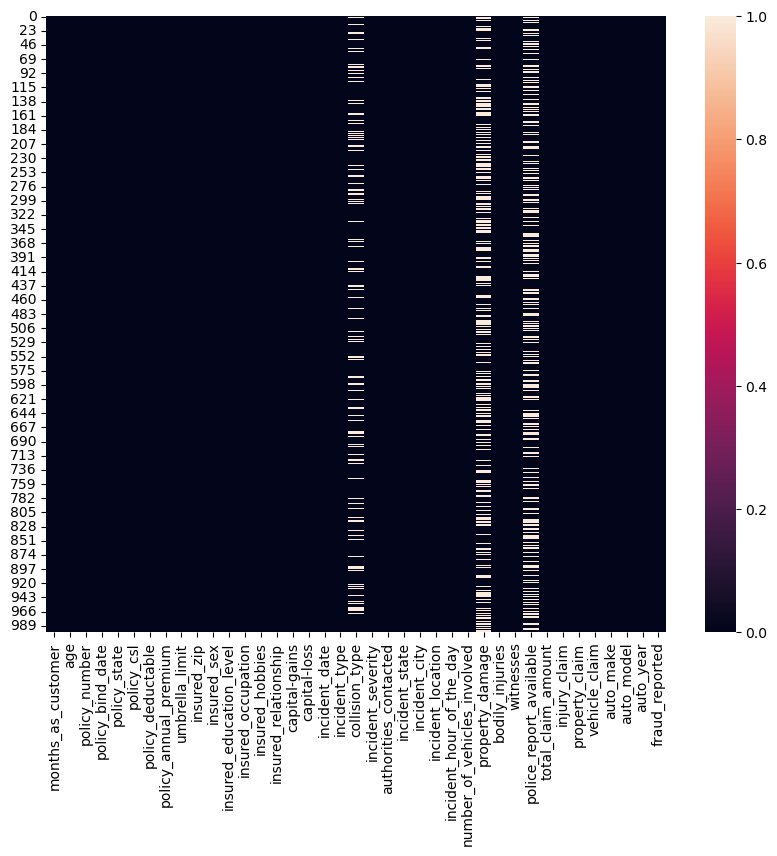

In [69]:
#heat map for dataset null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [70]:
df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)

In [71]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)

In [72]:
df['property_damage'].fillna(df['property_damage'].mode()[0], inplace=True)

In [73]:
#checing the null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

All the null values are handled

<AxesSubplot:>

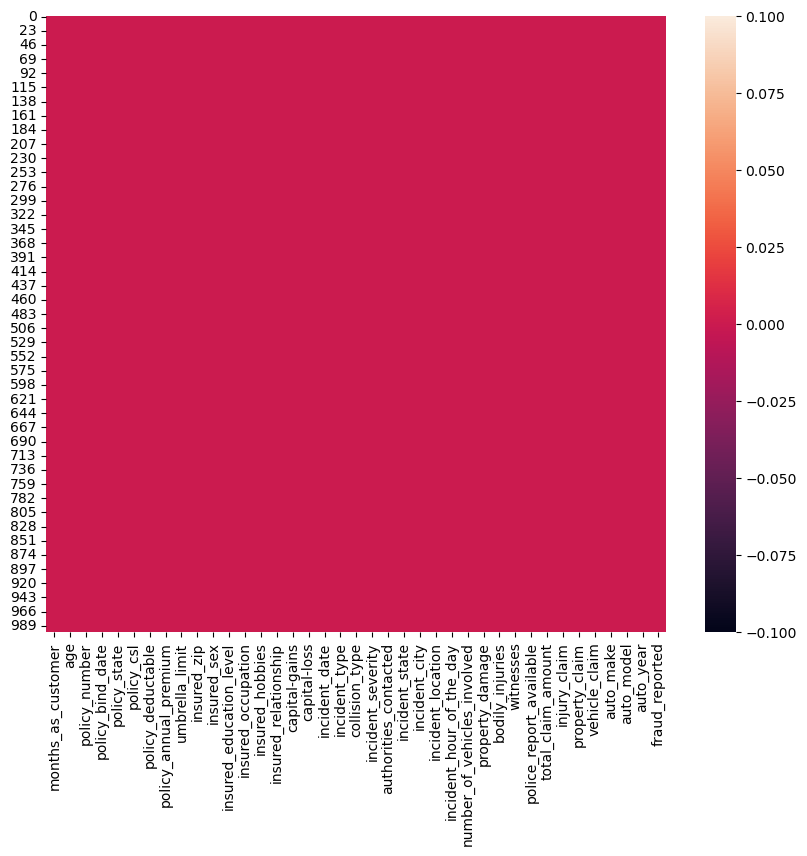

In [74]:
#heat map for dataset null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [75]:
#We can drop the pOLICY nUMBER ALSO, As it is not required for data Analysis
df.drop(["policy_number"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [76]:
#checking number of unique values in each column/feature
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [77]:
cols = ["age","policy_state","policy_csl","policy_deductable","umbrella_limit","insured_sex","insured_education_level",
       "insured_occupation","insured_hobbies","insured_relationship","incident_date","incident_type","collision_type",
        "incident_severity","authorities_contacted","incident_state","incident_city","incident_hour_of_the_day","number_of_vehicles_involved",
       "property_damage","bodily_injuries","witnesses","police_report_available","auto_make","auto_model","auto_year","fraud_reported"]

we can drop the incident location as it is different for every incident/case

In [78]:
#We can drop the incident_location ALSO, As it is not required for data Analysis
df.drop(["incident_location"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [79]:
#We can drop the insured_zip ALSO, As it is not required for data Analysis
df.drop(["insured_zip"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Univariate analysis for Categorical columns

Count plot for  policy_bind_date  : 


<Figure size 500x300 with 0 Axes>

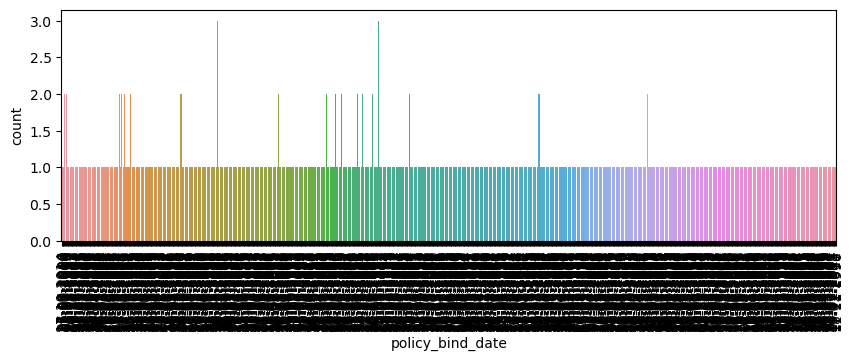

Count plot for  policy_state  : 


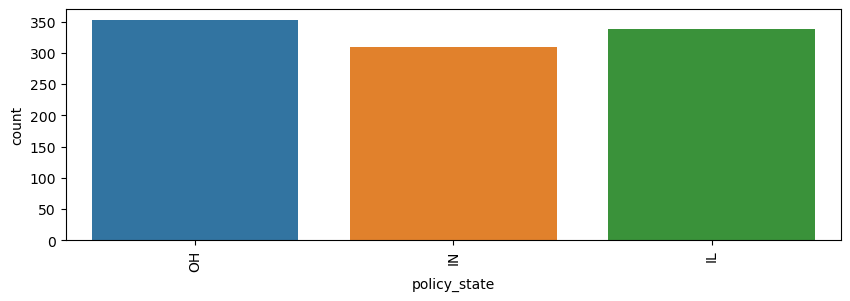

Count plot for  policy_csl  : 


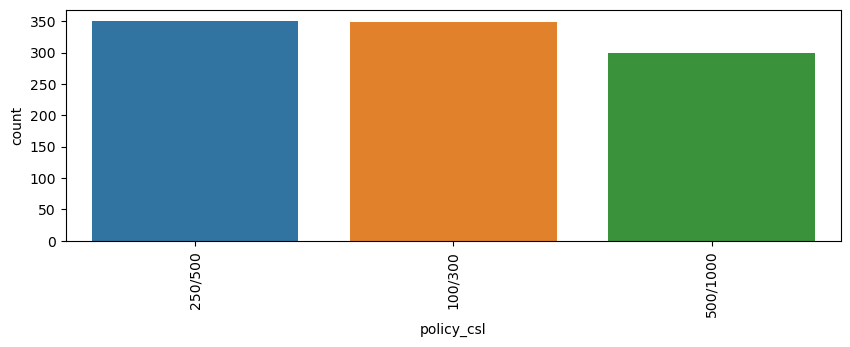

Count plot for  insured_sex  : 


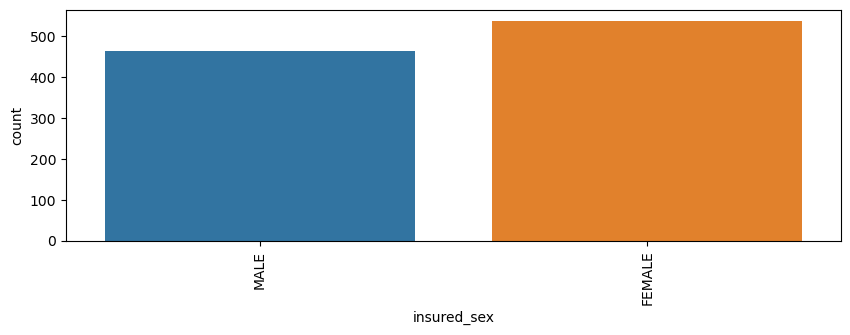

Count plot for  insured_education_level  : 


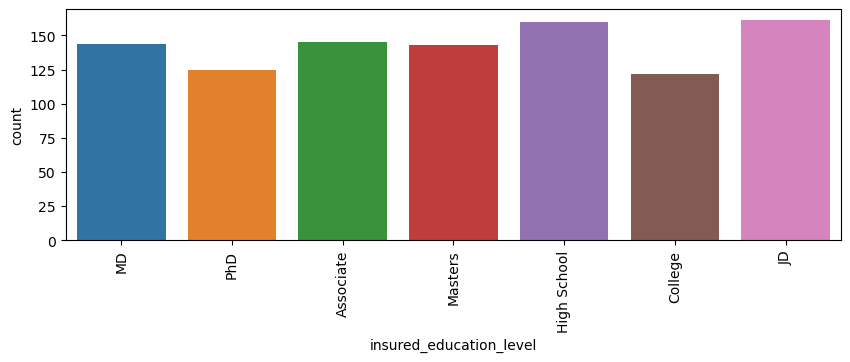

Count plot for  insured_occupation  : 


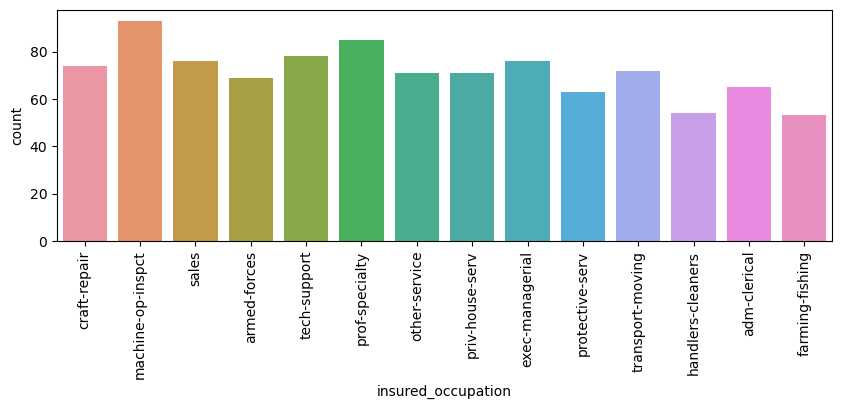

Count plot for  insured_hobbies  : 


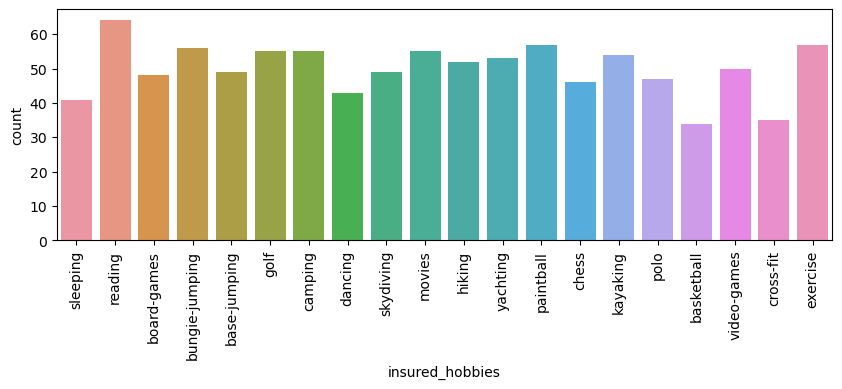

Count plot for  insured_relationship  : 


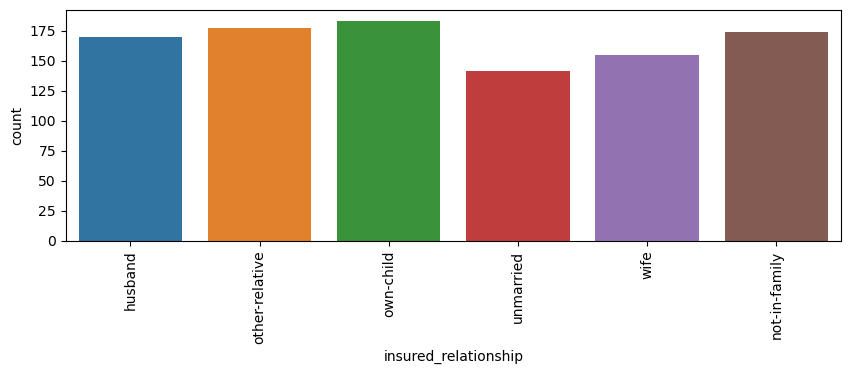

Count plot for  incident_date  : 


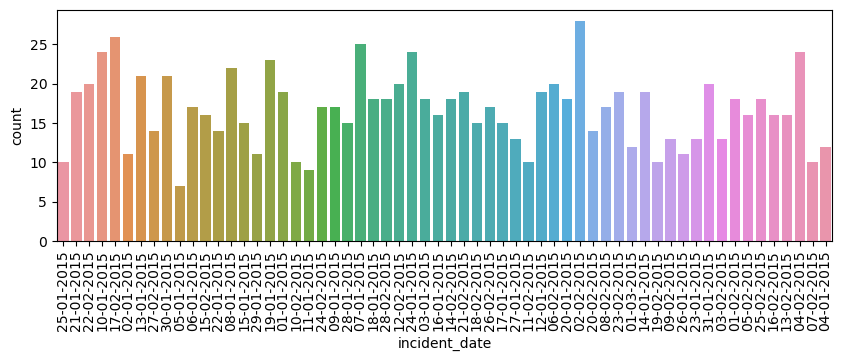

Count plot for  incident_type  : 


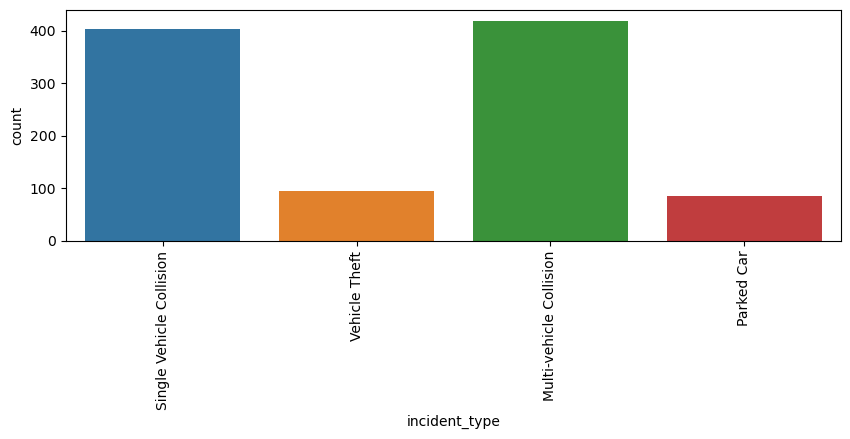

Count plot for  collision_type  : 


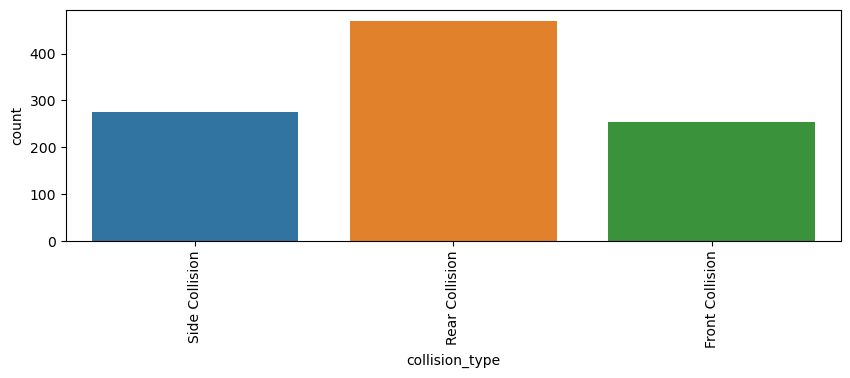

Count plot for  incident_severity  : 


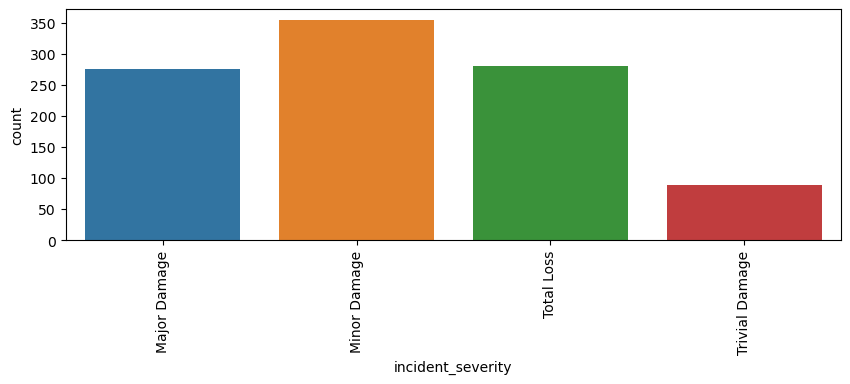

Count plot for  authorities_contacted  : 


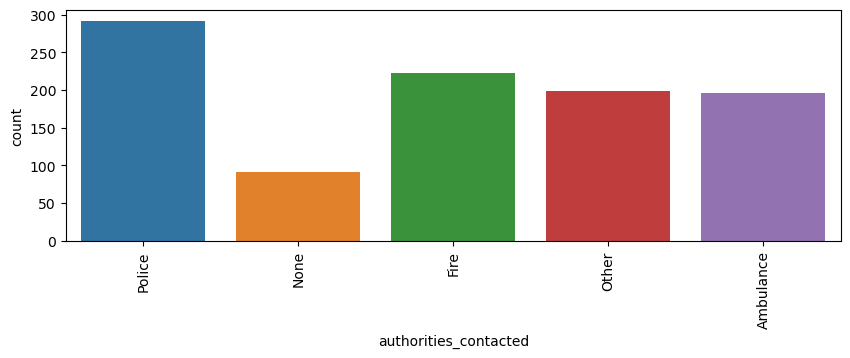

Count plot for  incident_state  : 


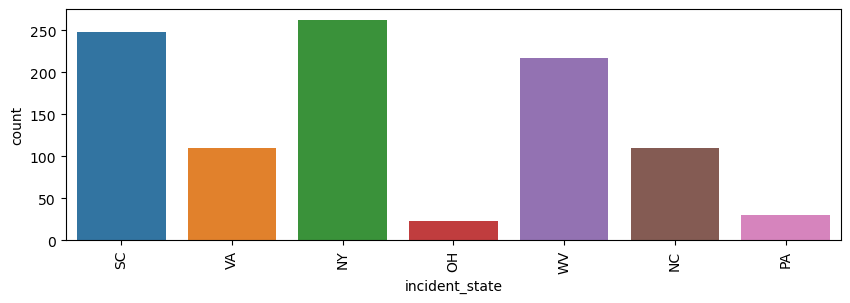

Count plot for  incident_city  : 


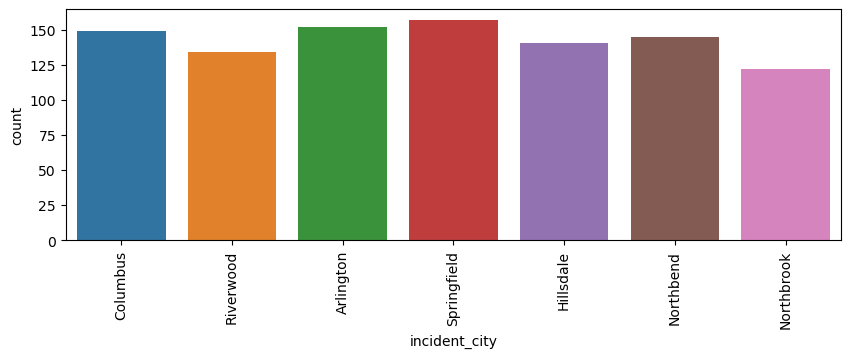

Count plot for  property_damage  : 


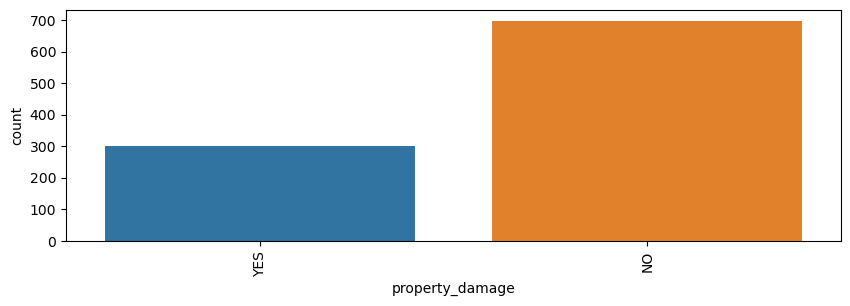

Count plot for  police_report_available  : 


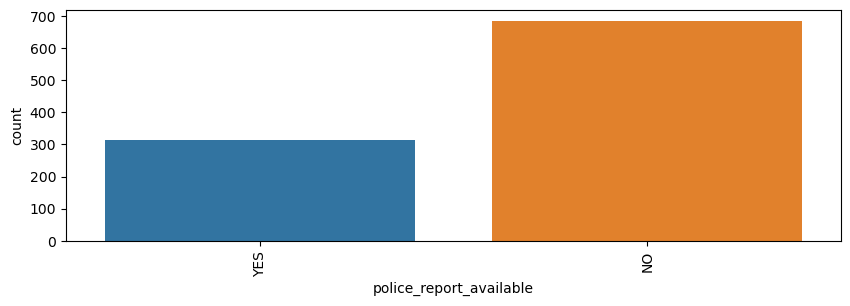

Count plot for  auto_make  : 


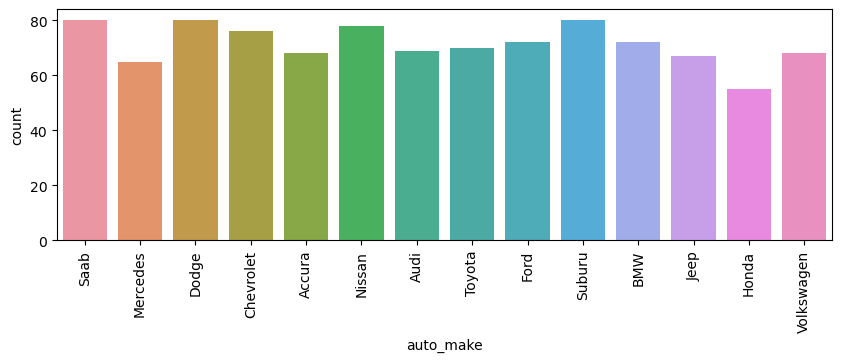

Count plot for  auto_model  : 


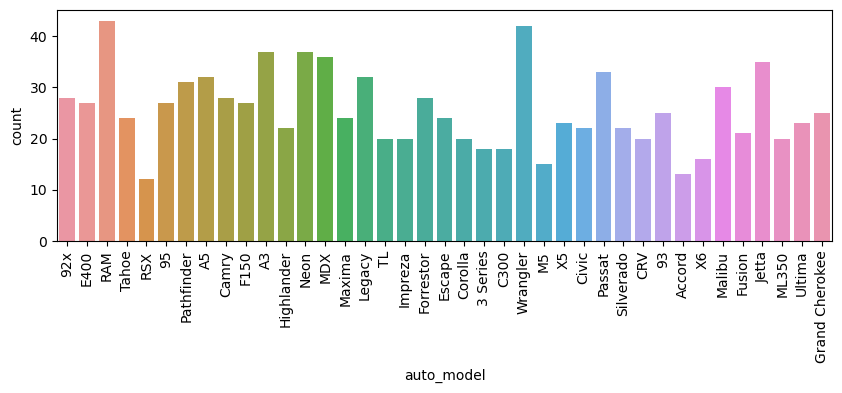

Count plot for  fraud_reported  : 


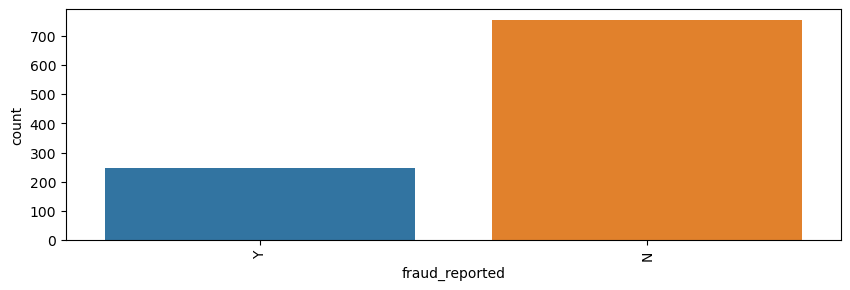

In [84]:
plt.figure(figsize=(5,3))
for i in df.columns:
    if df[i].dtypes == "object":
        print("Count plot for ",i," : ")
        plt.figure(figsize=(10,3))
        sns.countplot(x=i,data=df)
        print("=="*45)
        plt.xticks(rotation = 90)
        plt.show()

# Univariate analysis for Continous type features

Distribution plot for  months_as_customer  : 


<Figure size 500x300 with 0 Axes>

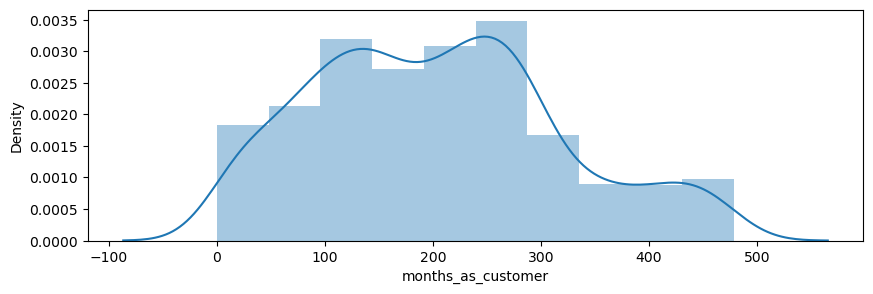

Distribution plot for  age  : 


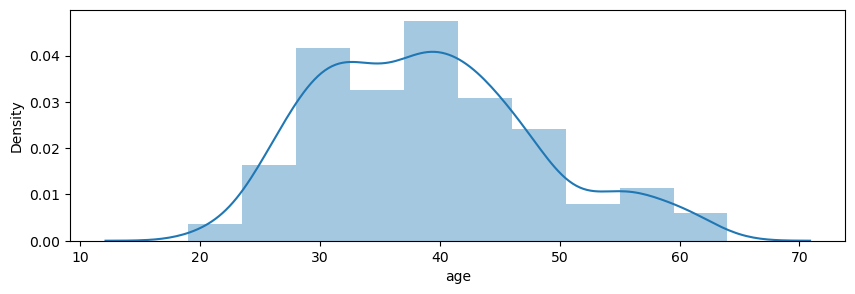

Distribution plot for  policy_deductable  : 


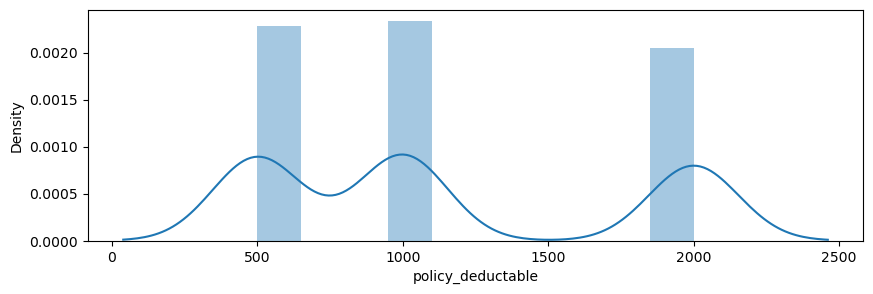

Distribution plot for  policy_annual_premium  : 


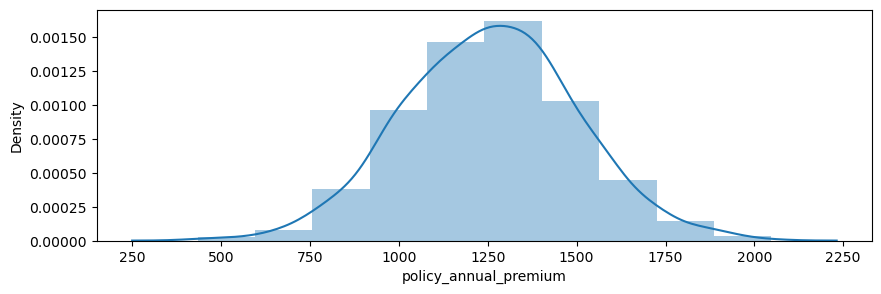

Distribution plot for  umbrella_limit  : 


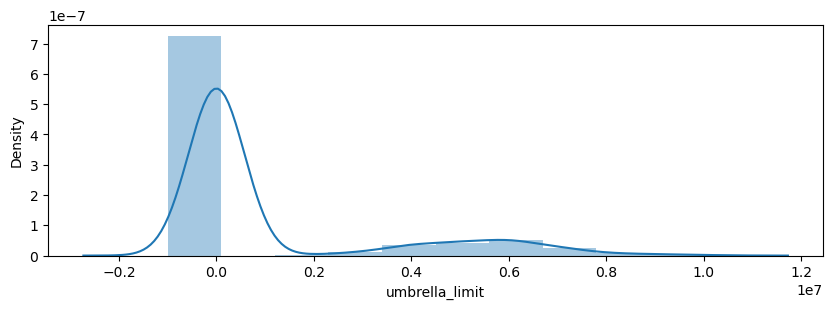

Distribution plot for  capital-gains  : 


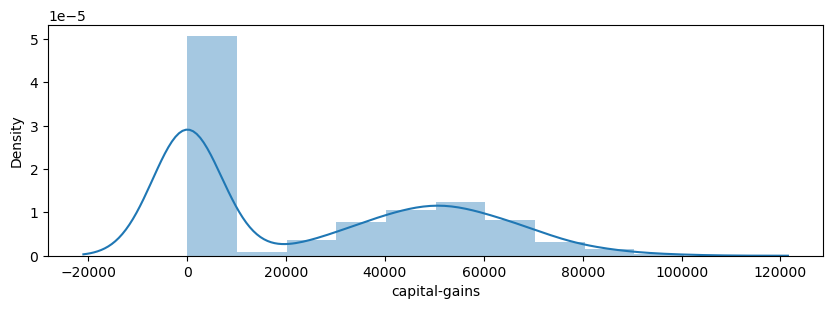

Distribution plot for  capital-loss  : 


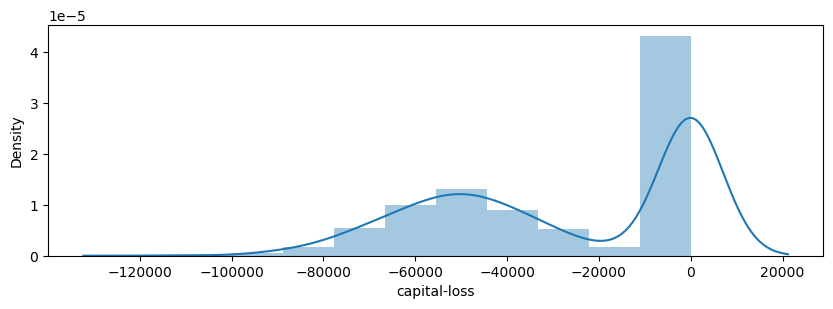

Distribution plot for  incident_hour_of_the_day  : 


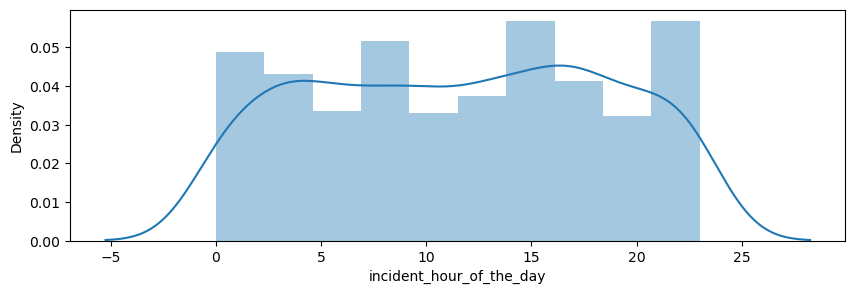

Distribution plot for  number_of_vehicles_involved  : 


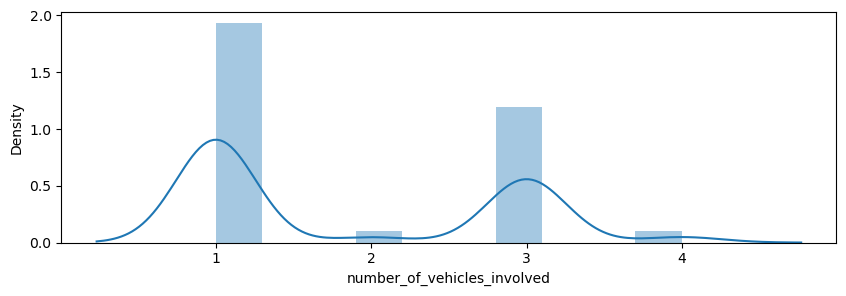

Distribution plot for  bodily_injuries  : 


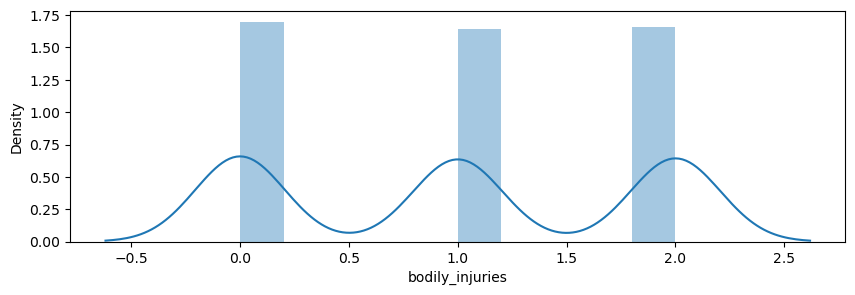

Distribution plot for  witnesses  : 


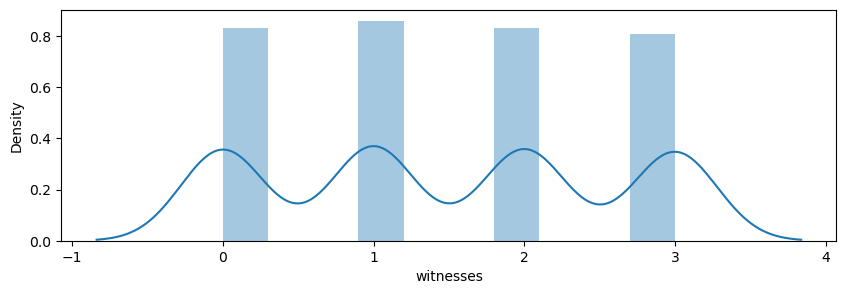

Distribution plot for  total_claim_amount  : 


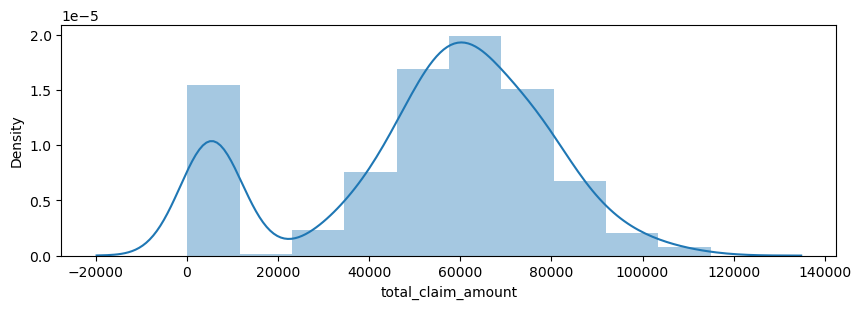

Distribution plot for  injury_claim  : 


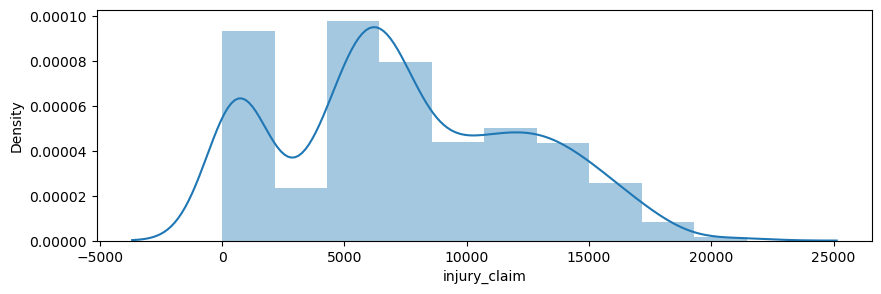

Distribution plot for  property_claim  : 


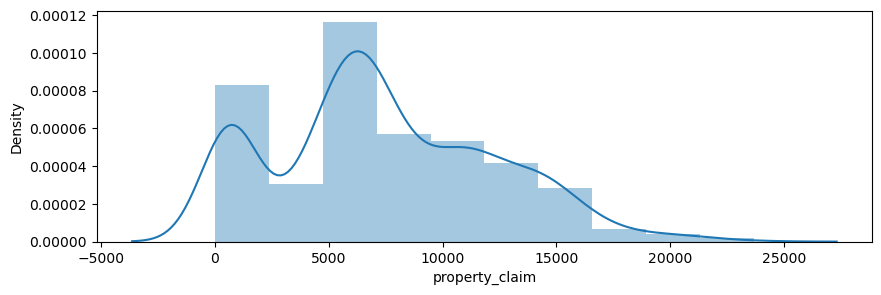

Distribution plot for  vehicle_claim  : 


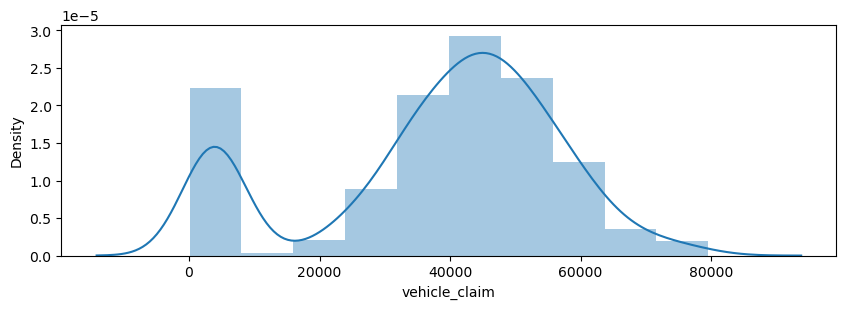

Distribution plot for  auto_year  : 


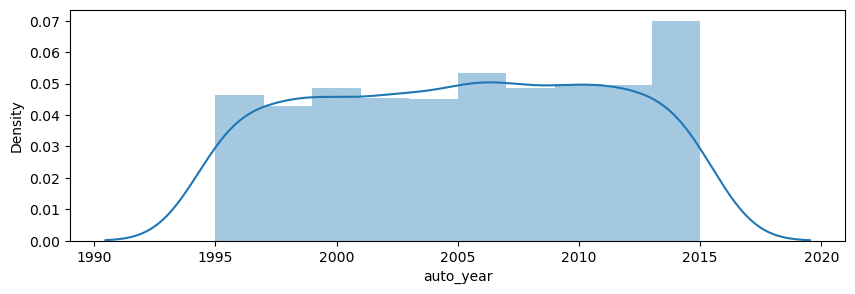

In [85]:
plt.figure(figsize=(5,3))
for i in df.columns:
    if df[i].dtypes != "object":
        print("Distribution plot for ",i," : ")
        plt.figure(figsize=(10,3))
        sns.distplot(df[i], bins=10)
        print("=="*45)
        plt.show()

Most of the customers are between 100 to 300 months as customers,

Most of the customers are in between the age 30 & 50

Most of the people has annual premium of 1250

Single and 3 vehicle involved incidents are high in the dataset

# BI variate analysis of features WRT Fraud

Count plot for  policy_bind_date  : 


<Figure size 500x300 with 0 Axes>

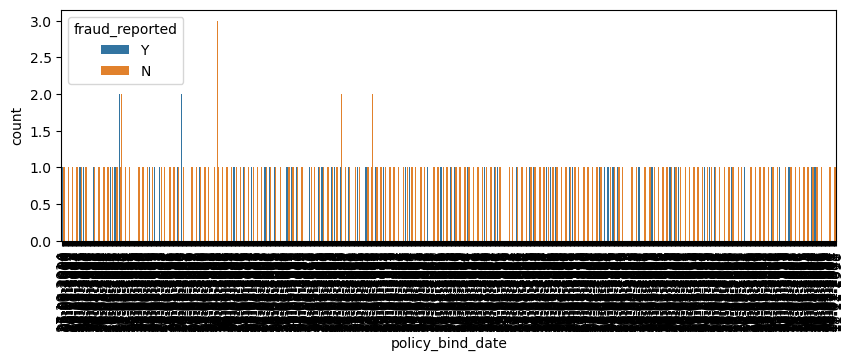

Count plot for  policy_state  : 


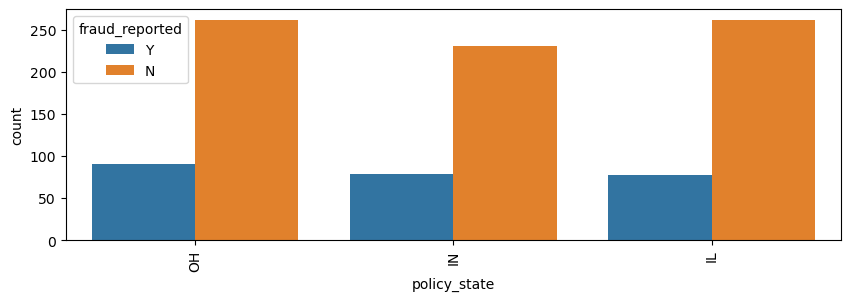

Count plot for  policy_csl  : 


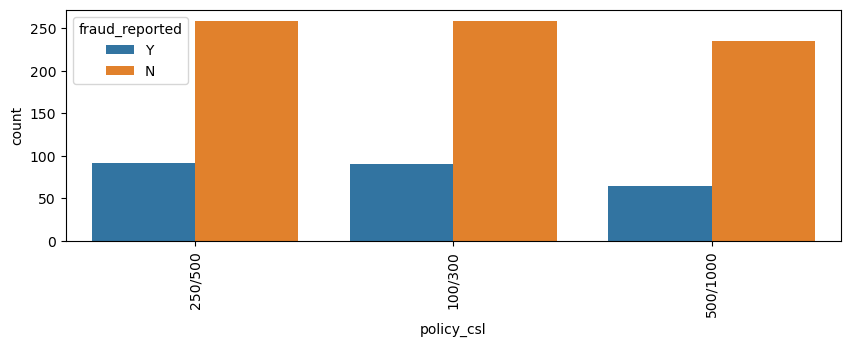

Count plot for  insured_sex  : 


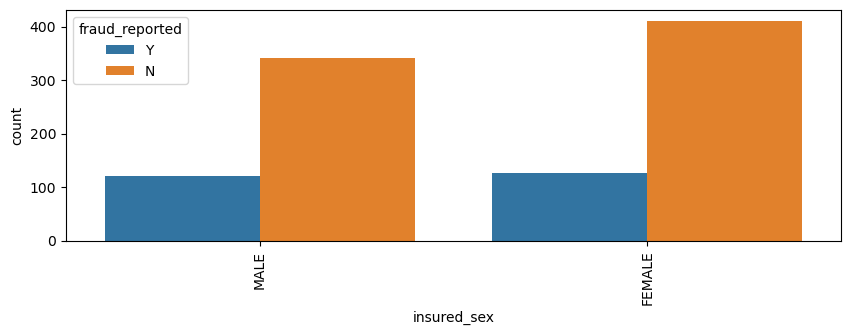

Count plot for  insured_education_level  : 


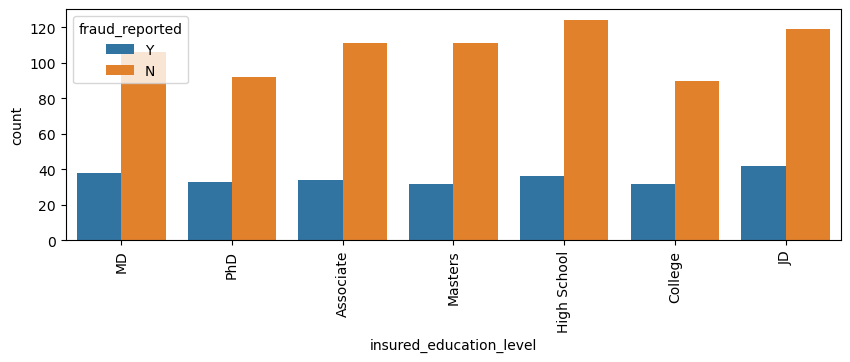

Count plot for  insured_occupation  : 


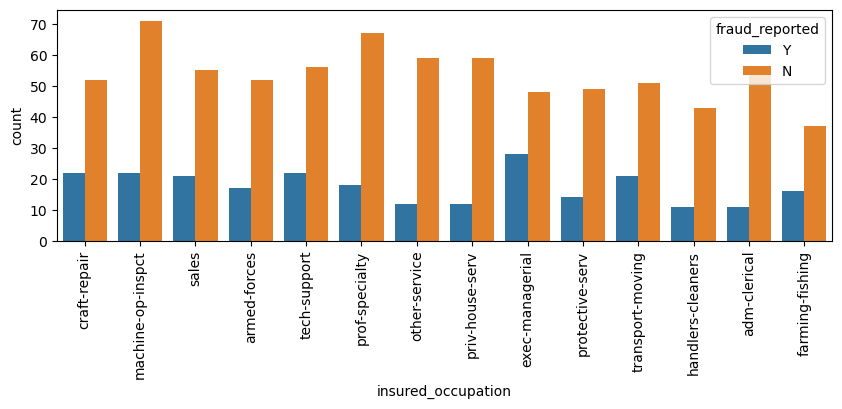

Count plot for  insured_hobbies  : 


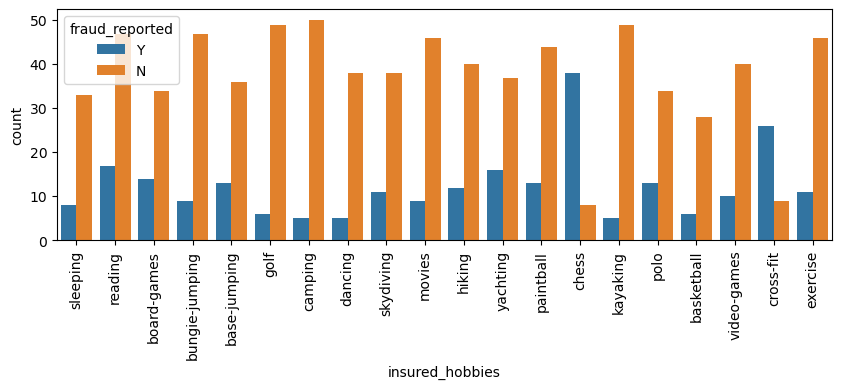

Count plot for  insured_relationship  : 


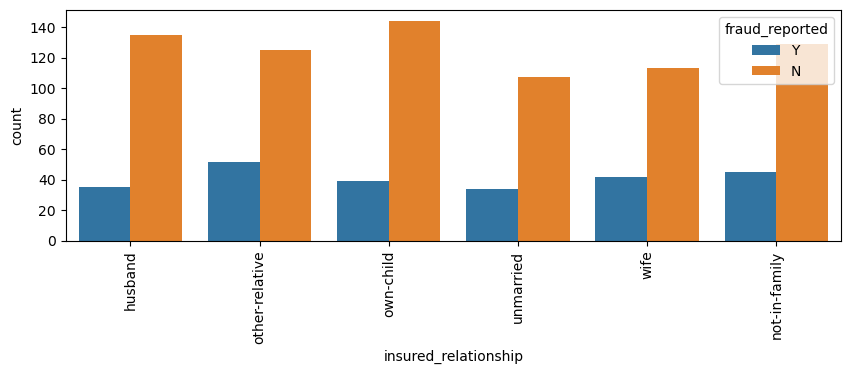

Count plot for  incident_date  : 


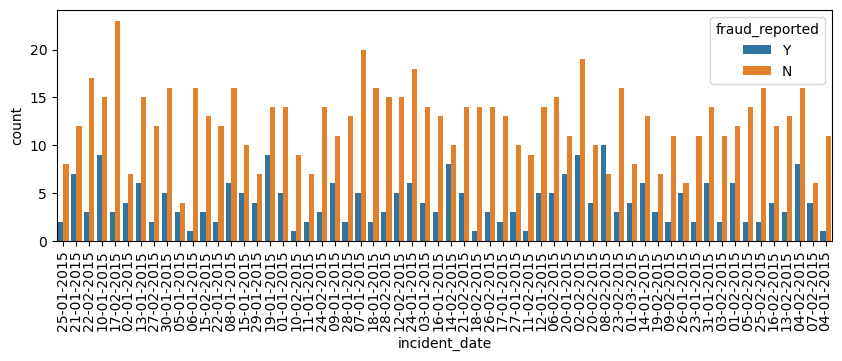

Count plot for  incident_type  : 


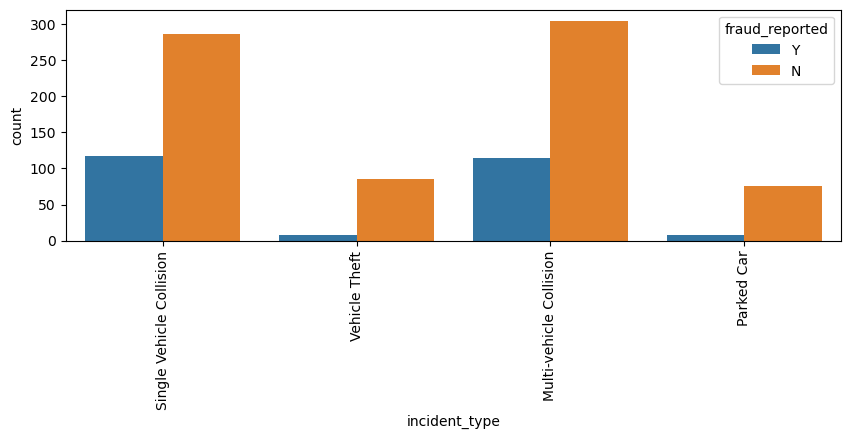

Count plot for  collision_type  : 


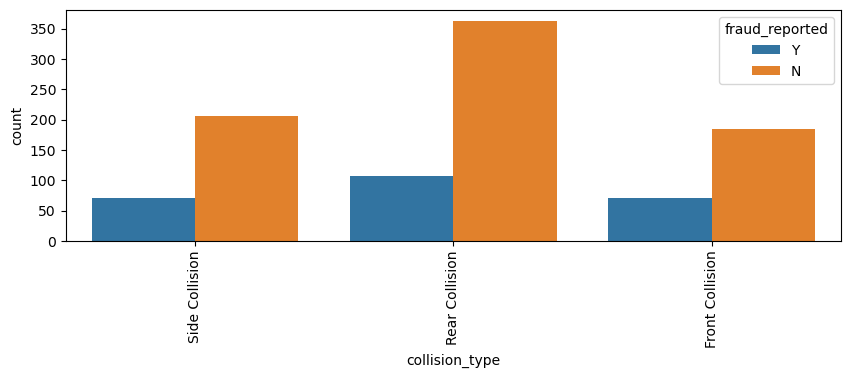

Count plot for  incident_severity  : 


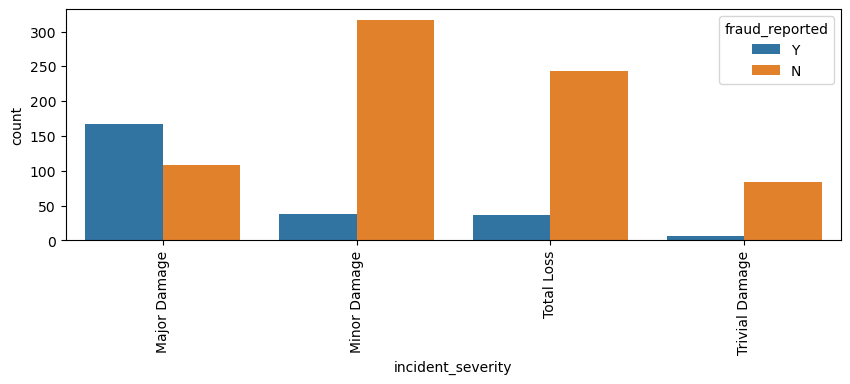

Count plot for  authorities_contacted  : 


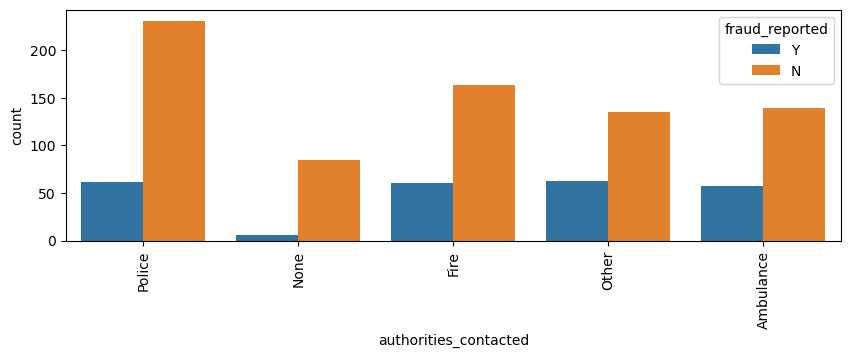

Count plot for  incident_state  : 


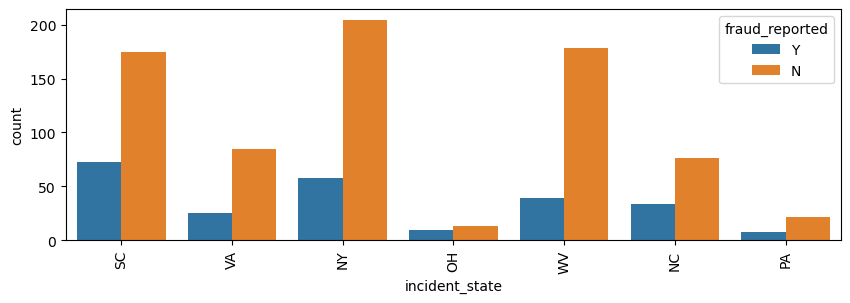

Count plot for  incident_city  : 


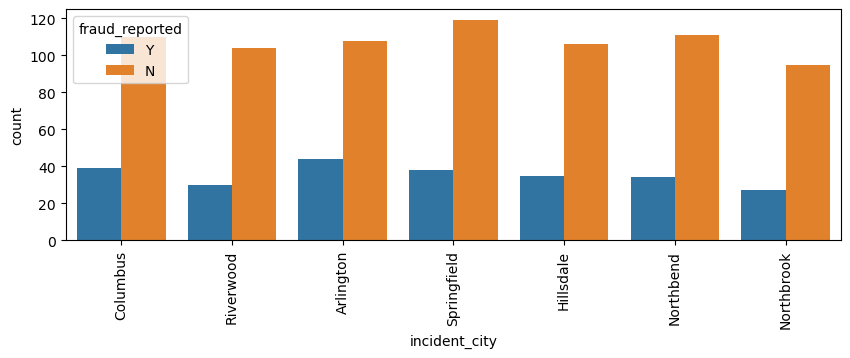

Count plot for  property_damage  : 


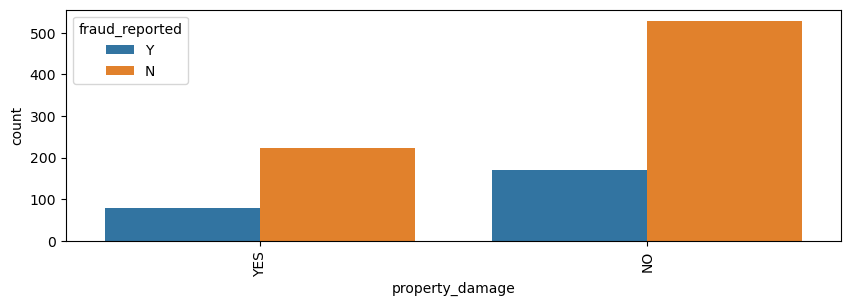

Count plot for  police_report_available  : 


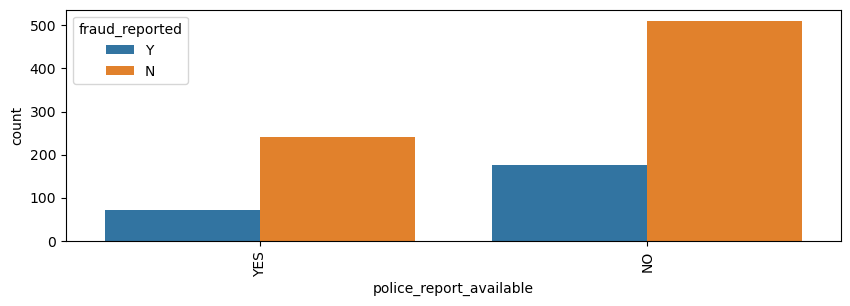

Count plot for  auto_make  : 


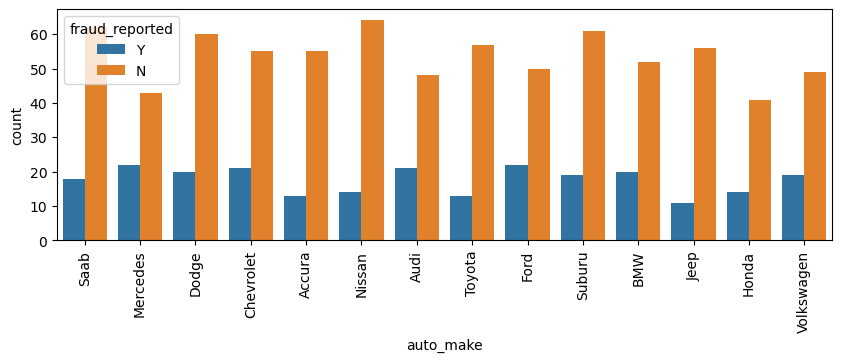

Count plot for  auto_model  : 


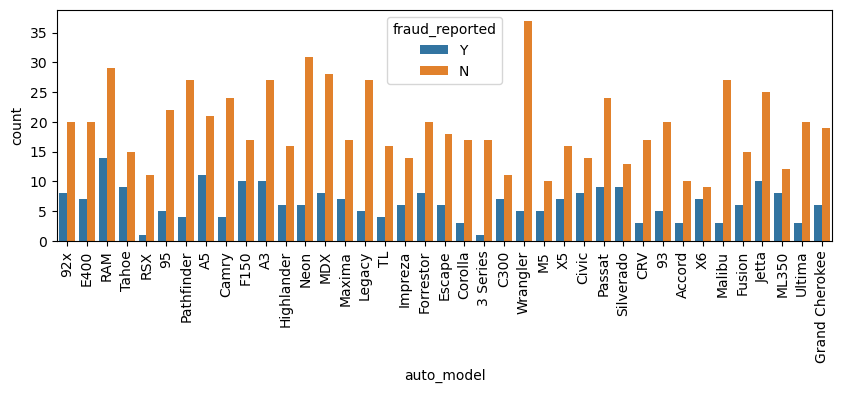

Count plot for  fraud_reported  : 


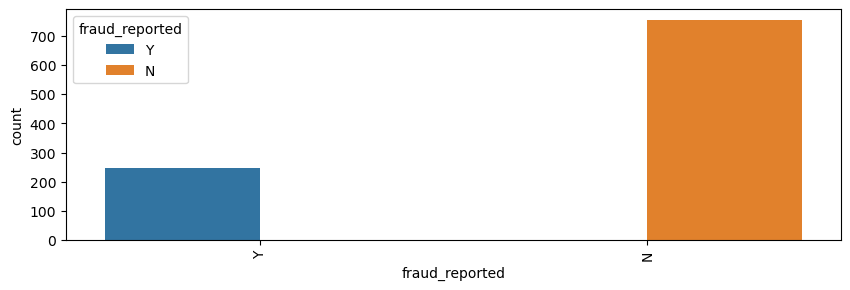

In [86]:
#categorical features vs Fraud report
plt.figure(figsize=(5,3))
for i in df.columns:
    if df[i].dtypes == "object":
        print("Count plot for ",i," : ")
        plt.figure(figsize=(10,3))
        sns.countplot(x=i,hue= "fraud_reported", data=df)
        print("=="*45)
        plt.xticks(rotation = 90)
        plt.show()

 Fraud reported for various education level is almost same, except for JD which has slightly higher in number.
    
MAle & female are almost in same proportion in fraud reports

Almost all the auto_makers in equal proportion in fraud reports

Single and mutli vehicles are reported higher number of fraud reports

customers with Chess as hobby were reported higher fraud reports and then the cross fit hobby people

Higher fraud reports are from exec-managerial occupation

In [ ]:
We can drop policy bind date,

In [91]:
#We can drop the policy_bind_date ALSO, As it is not required for data Analysis
df.drop(["policy_bind_date"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [92]:
#We can drop the incident_date ALSO, As it is not required for data Analysis, As number of months as customer is already given
df.drop(["incident_date"],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Checking for Outliers

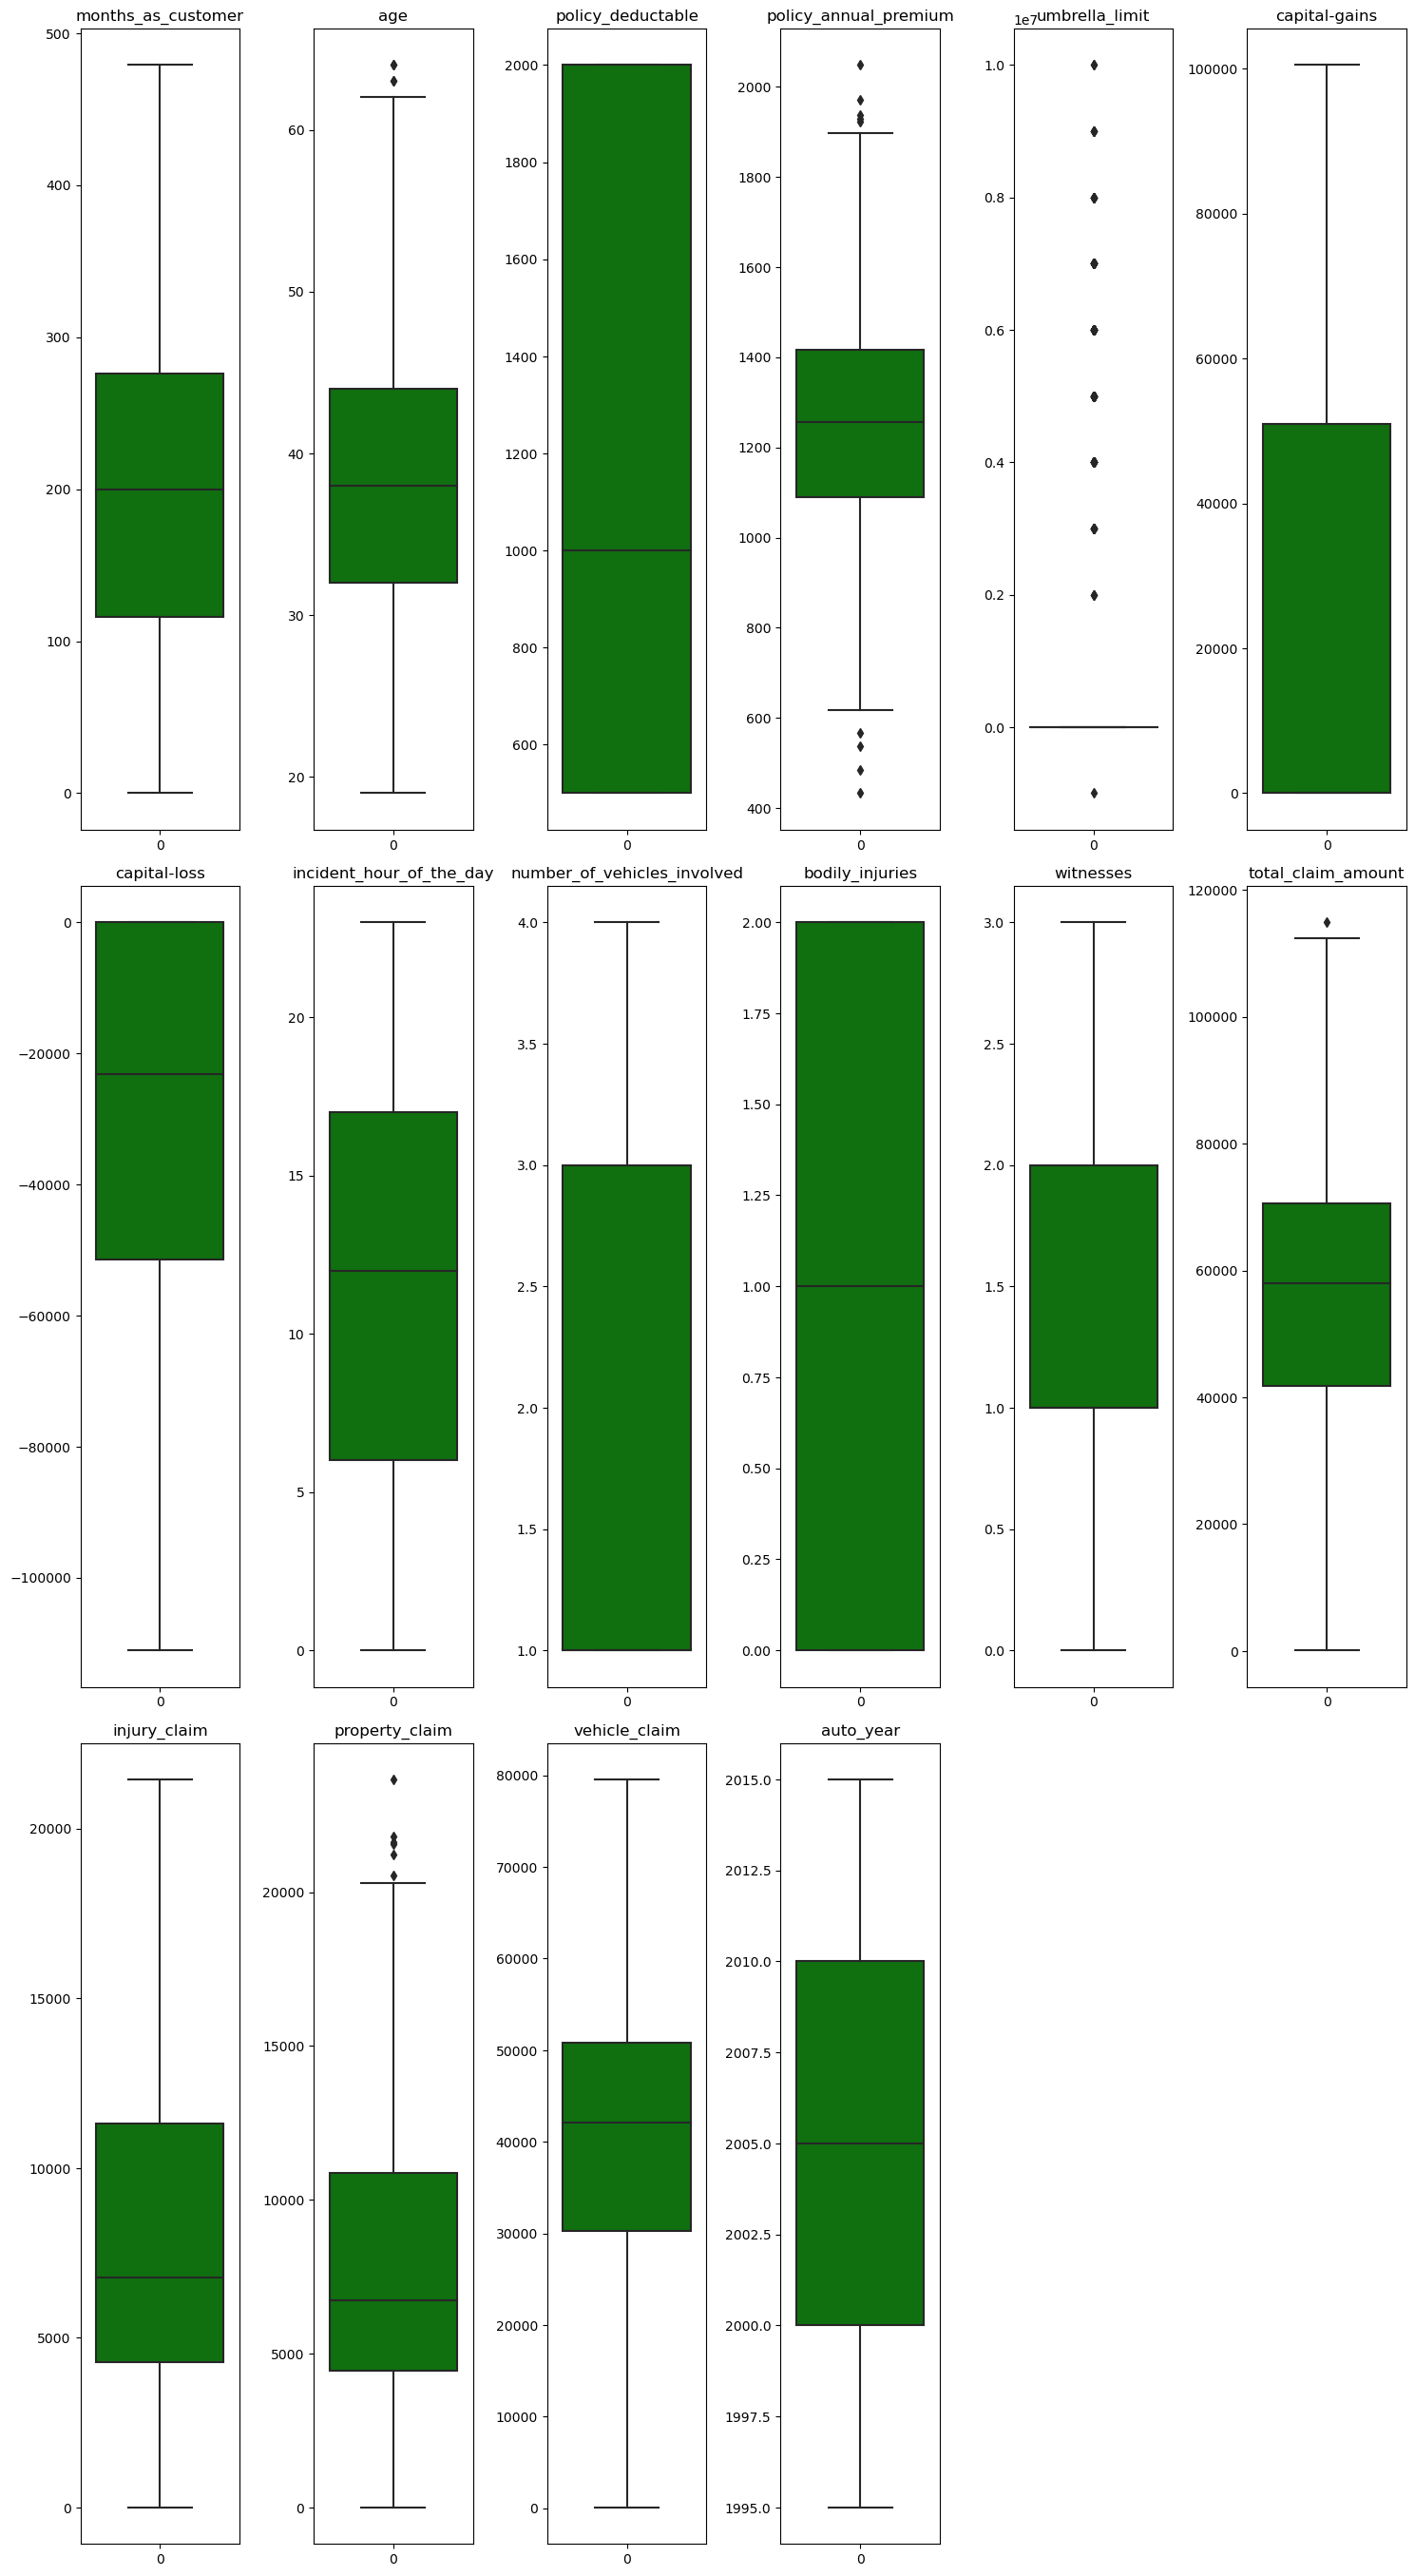

In [99]:
# checking with Boxplots
ncol=15
nrows=14
col = ["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","capital-gains","capital-loss",
       "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount",
       "injury_claim","property_claim","vehicle_claim","auto_year"]
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(col)):
    plt.subplot(5,6,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.title(col[i])  # Add plot name as title
    plt.tight_layout()

There are outliers in Age, Policy annual premium, umbrella_limit,

# ZScore Method

In [113]:
from scipy.stats import zscore


z=np.abs(zscore(df[col]))

dfn = df[(z<3).all(axis=1)]

dfn

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [114]:
df.shape,dfn.shape

((1000, 34), (980, 34))

In [115]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])
loss_percent=(df.shape[0]-dfn.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (1000, 34)
New DataFrame data in Rows and Column: (980, 34)
Total Dropped rows: 20
2.0 %


Here we lost 2% data in Zscore method

# IQR Method

In [116]:
#1st quantile
Q1=df[col].quantile(0.25)

# 3rd quantile
Q3=df[col].quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [117]:
dfs.shape

(782, 34)

In [118]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in IQR Rows and Column:",dfs.shape)
print("Total Dropped rows IN IQR method:",df.shape[0]-dfs.shape[0])
loss_percent=(df.shape[0]-dfs.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (1000, 34)
New DataFrame data in IQR Rows and Column: (782, 34)
Total Dropped rows IN IQR method: 218
21.8 %


Here 21% data removed, which is huge, so we will continue with ZSCORE method

# Checking for skewness

In [119]:
# Checking the skewness
dfn.skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
dtype: float64

We need to remove skewness from the columns where skewness is more >0.5 and <-0.5, for continuous data type columns

In [108]:
#Skew columns assigning to seperate list
Skew_col = ['umbrella_limit', "total_claim_amount", "vehicle_claim", "number_of_vehicles_involved"]

# Categorical Columns data Encoding

In [120]:
from sklearn.preprocessing import OrdinalEncoder
Enc=OrdinalEncoder()

In [121]:
for i in dfn.columns:
    if dfn[i].dtypes=="object":
        dfn[i]=Enc.fit_transform(dfn[i].values.reshape(-1,1))

In [122]:
dfn

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,0.0,5.0,2.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,0.0,0.0,1000,1436.79,0,0.0,6.0,9.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,2.0,1.0,500,1383.49,3000000,0.0,5.0,1.0,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,0.0,2.0,2000,1356.92,5000000,1.0,0.0,5.0,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [123]:
dfn.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.00000,980.000000,980.000000
mean,204.613265,38.973469,1.020408,0.945918,1137.244898,1257.206510,9.918367e+05,0.465306,2.959184,6.643878,...,1.481633,0.315306,52693.010204,7426.244898,7386.173469,37880.591837,6.569388,19.25102,2005.133673,0.244898
std,115.420174,9.184040,0.830713,0.804821,611.258486,241.568379,2.120943e+06,0.499050,1.954113,4.018943,...,1.112043,0.464875,26341.641716,4885.829062,4793.054917,18846.130656,4.028788,11.13132,6.014240,0.430246
min,0.000000,19.000000,0.000000,0.000000,500.000000,538.170000,-1.000000e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.00000,1995.000000,0.000000
25%,116.000000,32.000000,0.000000,0.000000,500.000000,1087.875000,0.000000e+00,0.000000,1.000000,3.000000,...,0.000000,0.000000,41697.500000,4277.500000,4480.000000,30220.000000,3.000000,10.00000,2000.000000,0.000000
50%,200.000000,38.000000,1.000000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,...,1.000000,0.000000,57880.000000,6760.000000,6745.000000,42080.000000,7.000000,20.00000,2005.000000,0.000000
75%,278.000000,44.250000,2.000000,2.000000,2000.000000,1415.825000,0.000000e+00,1.000000,5.000000,10.000000,...,2.000000,1.000000,70425.000000,11235.000000,10860.000000,50727.500000,10.000000,29.00000,2010.000000,0.000000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,1969.630000,7.000000e+06,1.000000,6.000000,13.000000,...,3.000000,1.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,38.00000,2015.000000,1.000000


<AxesSubplot:>

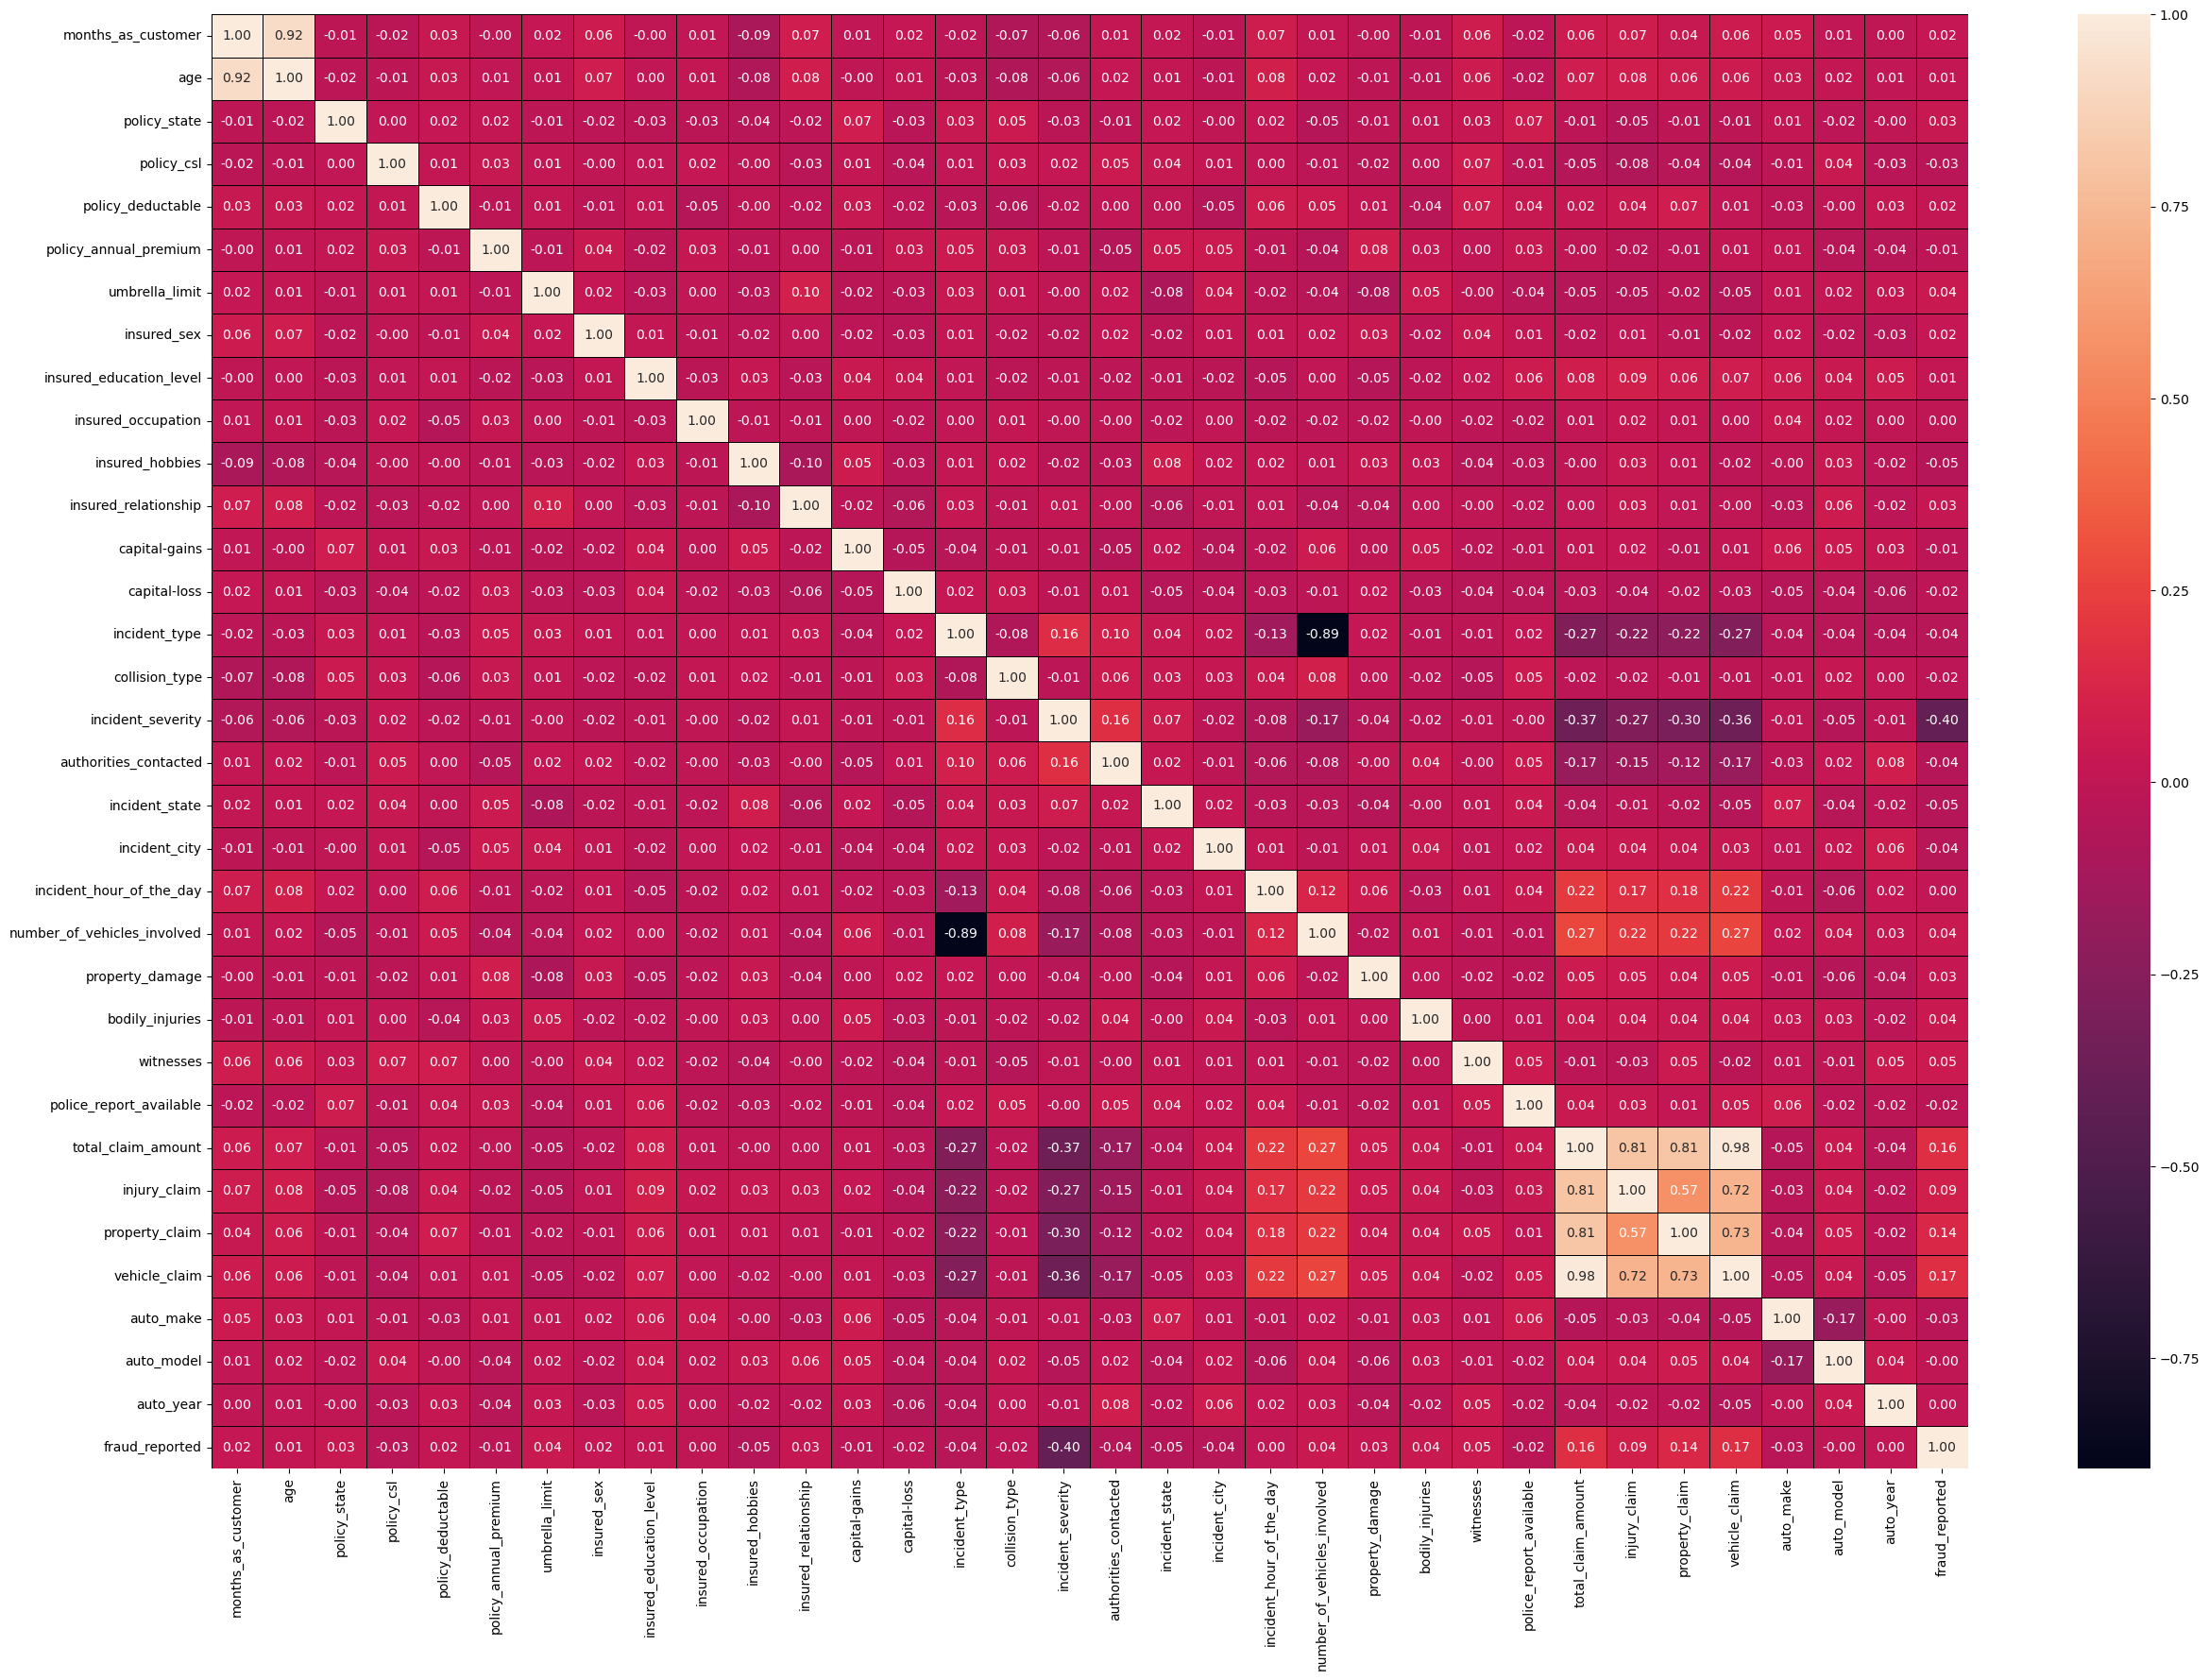

In [124]:
# heat map for correaltion

plt.figure(figsize=(30,20))
sns.heatmap(dfn.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

In [126]:
dfn.corr()["fraud_reported"].sort_values()

incident_severity             -0.401808
incident_state                -0.052027
insured_hobbies               -0.048181
authorities_contacted         -0.043636
incident_type                 -0.040893
incident_city                 -0.039434
policy_csl                    -0.032509
auto_make                     -0.032206
police_report_available       -0.023867
capital-loss                  -0.017617
collision_type                -0.016776
capital-gains                 -0.014993
policy_annual_premium         -0.012686
auto_model                    -0.002825
insured_occupation             0.000277
auto_year                      0.001152
incident_hour_of_the_day       0.004326
insured_education_level        0.013116
age                            0.013279
policy_deductable              0.015774
insured_sex                    0.020582
months_as_customer             0.021285
property_damage                0.025897
insured_relationship           0.026575
policy_state                   0.034587


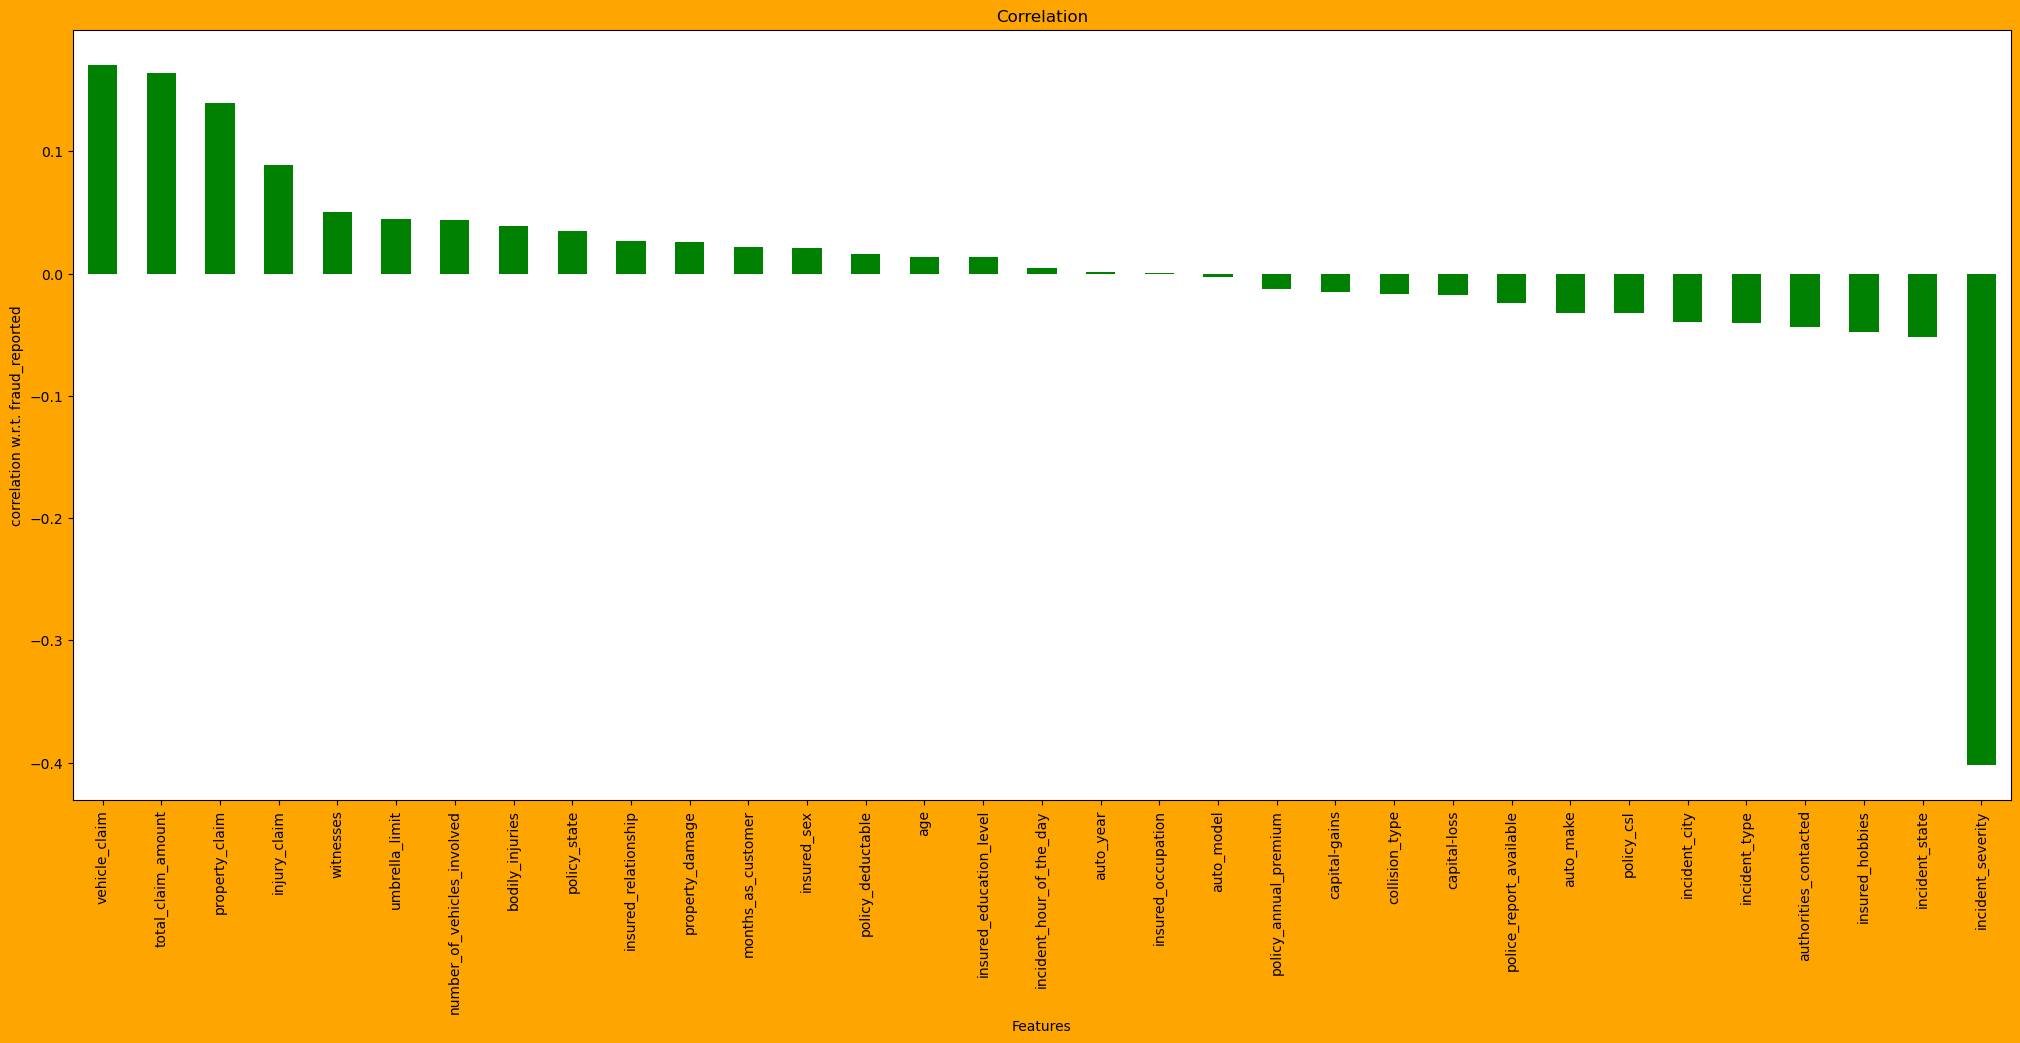

In [129]:
plt.figure(figsize =(25, 10),facecolor = 'orange')
dfn.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('correlation w.r.t. fraud_reported')
plt.title('Correlation')
plt.show()

Vehicle claim is highly positive correeletaed and incident_severity is highly negeative correlated

# Splitting the data into features and target

In [130]:
x = dfn.drop(['fraud_reported'], axis=1)
y = dfn['fraud_reported']

In [131]:
print(x.shape)
print(y.shape)

(980, 33)
(980,)


In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [133]:
x_scaled

array([[ 1.06956809,  0.98335151,  1.17982066, ...,  0.85195935,
        -1.64044692, -0.18859446],
       [ 0.20272605,  0.32971067, -0.0245796 , ...,  0.35527871,
        -0.65173967,  0.31047639],
       [-0.61210547, -1.08651116,  1.17982066, ..., -0.63808258,
         0.96614491,  0.31047639],
       ...,
       [-0.64677915, -0.54181045,  1.17982066, ...,  1.10029967,
        -0.02256234, -1.51945005],
       [ 2.19646275,  2.50851348, -1.22897986, ..., -1.38310355,
        -1.28091701, -1.18673615],
       [ 2.17912591,  2.2906332 ,  1.17982066, ...,  0.35527871,
        -0.65173967,  0.31047639]])

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,6.891793,months_as_customer
1,6.908536,age
2,1.028724,policy_state
3,1.027743,policy_csl
4,1.039520,policy_deductable
5,1.032808,policy_annual_premium
6,1.037868,umbrella_limit
7,1.024041,insured_sex
8,1.042405,insured_education_level
9,1.014294,insured_occupation


Lets check the VIF by removing the total Claim amount column

In [135]:
dfn_v1=dfn.drop(["total_claim_amount"],axis=1)
dfn_v1.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,1,2,1.0,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0,0,0.0,780,780,3510,8.0,12.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,2,3,0.0,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,1,2,0.0,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,0,1,0.0,1300,650,4550,0.0,31.0,2009,0.0


In [136]:
x = dfn_v1.drop(['fraud_reported'], axis=1)
y = dfn_v1['fraud_reported']

In [137]:
print(x.shape)
print(y.shape)

(980, 32)
(980,)


In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,6.891793,months_as_customer
1,6.908536,age
2,1.028724,policy_state
3,1.027743,policy_csl
4,1.039520,policy_deductable
5,1.032808,policy_annual_premium
6,1.037868,umbrella_limit
7,1.024041,insured_sex
8,1.042405,insured_education_level
9,1.014294,insured_occupation


Now all the features VIF is under 10, So we can continue with the new dataset 

# Model Building

# Splitting the data for training and testing:

In [140]:
y.value_counts()

0.0    740
1.0    240
Name: fraud_reported, dtype: int64

In [141]:
# This is imbalanced data for the target column, so we have to balance the data first

# Balancing The Data

In [142]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [143]:
#Applying SMOTE technique on DATa
X,Y=sm.fit_resample(x,y)

X.shape, Y.shape

((1480, 32), (1480,))

In [144]:
Y.value_counts()

1.0    740
0.0    740
Name: fraud_reported, dtype: int64

# Noiw the data is balanced

# Splitting the data for training and testing:

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [146]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6317567567567568 on Random State = 180


In [147]:
#selecting Random State 180

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=180,test_size=.20)

In [148]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [150]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 63.17567567567568
Confusion Matrix of  LogisticRegression()  is 
 [[ 82  59]
 [ 50 105]]
              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60       141
         1.0       0.64      0.68      0.66       155

    accuracy                           0.63       296
   macro avg       0.63      0.63      0.63       296
weighted avg       0.63      0.63      0.63       296

Accuracy_Score of  RidgeClassifier() is 77.7027027027027
Confusion Matrix of  RidgeClassifier()  is 
 [[108  33]
 [ 33 122]]
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       141
         1.0       0.79      0.79      0.79       155

    accuracy                           0.78       296
   macro avg       0.78      0.78      0.78       296
weighted avg       0.78      0.78      0.78       296

Accuracy_Score of  DecisionTreeClassifier() is 87.83783783783784
Confusion Matrix of  Dec

Here Gradient Boosting calssifier is workiong with 90.87% accuracy

# CrossValidation

In [151]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 63.17567567567568
cross Validation accuracy score of  LogisticRegression()  is  55.87837837837839
Accuracy_Score of  RidgeClassifier() is 77.7027027027027
cross Validation accuracy score of  RidgeClassifier()  is  73.5810810810811
Accuracy_Score of  DecisionTreeClassifier() is 87.83783783783784
cross Validation accuracy score of  DecisionTreeClassifier()  is  82.9054054054054
Accuracy_Score of  SVC() is 51.689189189189186
cross Validation accuracy score of  SVC()  is  51.75675675675675
Accuracy_Score of  KNeighborsClassifier() is 69.5945945945946
cross Validation accuracy score of  KNeighborsClassifier()  is  70.20270270270271
Accuracy_Score of  RandomForestClassifier() is 87.83783783783784
cross Validation accuracy score of  RandomForestClassifier()  is  85.87837837837839
Accuracy_Score of  SGDClassifier() is 60.13513513513513
cross Validation accuracy score of  SGDClassifier()  is  51.689189189189186
Accuracy_Score of  BaggingClassifier() is

Taking Random Forrest Classifer into consideration as 88% accuracy and  good cv score

# Hyper parameter tuning For RFClassifier

In [152]:
n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [153]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [154]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, max_features='sqrt', min_samples_split=3,
                       n_estimators=400)

In [155]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

In [156]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.8716216216216216

# ROC AUC Plot

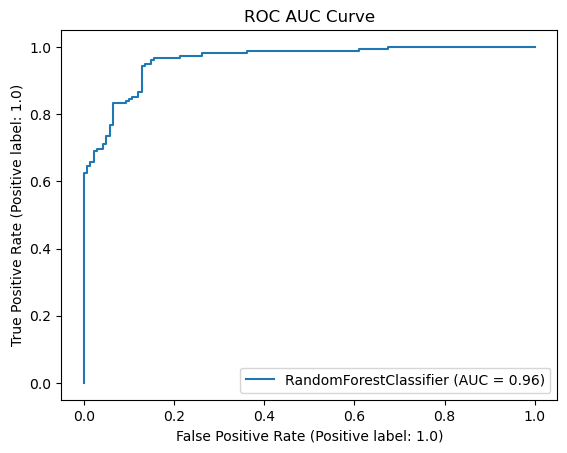

In [157]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

# Saving the Model

In [158]:
import joblib
joblib.dump(grid_search.best_estimator_,"Insurance_Claim_Fraud.pkl")

['Insurance_Claim_Fraud.pkl']

# Testing/ Prediction

In [159]:
#Loading the saved model
GCV_pred=joblib.load("Insurance_Claim_Fraud.pkl")

#Prediction
prediction = GCV_pred.predict(X_test)
prediction

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

In [160]:
pd.DataFrame([GCV_pred.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
Predicted,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Actual,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
